In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Text(0, 0.5, 'Semi-Major Axis, AU')

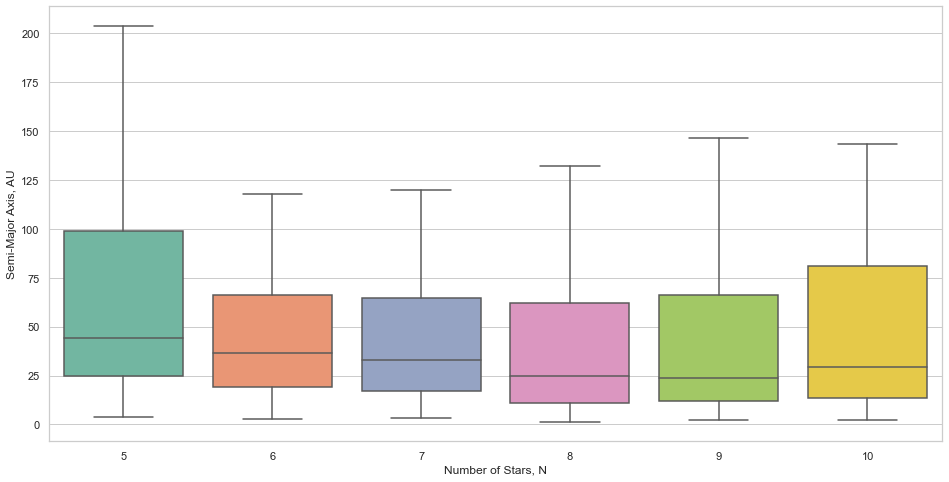

In [4]:
# Setting how many files of data we have
nFiles = 6
parameters = ["5-100-2", "6-100-2", "7-100-2", "8-100-2", "9-100-2", "10-100-2"]
column = 1
nStars = [5, 6, 7, 8, 9, 10]

# Creating dataframe columns
columns = ["SemiMajorAxis", "Type", "NStars"]

# Creating empty lists
a = []
t = []
n = []
meansB = []
SDsB = []
meansT = []
SDsT = []

# Looping through every file
for i in range(nFiles):
    # Generating the filenames
    filenameB = "binaryData" + parameters[i] + ".csv"
    filenameT = "tripleData" + parameters[i] + ".csv"
    
    # Loading in the files as dataframes
    dataFrameB = pd.read_csv(filenameB, header=None)
    dataFrameT = pd.read_csv(filenameT, header=None)
    
    # Getting rid of NaN in the triple data
    dataFrameT = dataFrameT.dropna()
    
    # Extracting the semi-major axis data
    aB = dataFrameB[column].to_numpy()
    aT = dataFrameT[column].to_numpy()
    
    # Calculating the means and SDs
    meansB.append(np.mean(aB/1.5e11))
    SDsB.append(np.std(aB[aB<0.1*max(aB)]/1.5e11))
    meansT.append(np.mean(aT/1.5e11))
    SDsT.append(np.std(aT/1.5e11))
    
    # Looping
    for j in range(len(aB)):
        a.append(aB[j]/1.5e11)
        t.append("Binary")
        n.append(nStars[i])
        
    for j in range(len(aT)):
        a.append(aT[j]/1.5e11)
        t.append("Triple")
        n.append(nStars[i])
        
# Creating dictionary
dict = {"SemiMajorAxis" : a, "Type": t, "NStars": n}
        
# Creating a dataframe
df = pd.DataFrame(dict)

# Plotting
plt.figure(figsize=(16,8))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="NStars", y="SemiMajorAxis", data=df[df["Type"] == "Binary"], palette="Set2", showfliers =False)
plt.xlabel("Number of Stars, N")
plt.ylabel("Semi-Major Axis, AU")

# Calculating means and SDs
#plt.plot(meansB, "ko", markersize=4)
#plt.errorbar(x=[0,1,2,3,4,5], y=meansB, yerr=SDsB, fmt=".k", capsize=7)



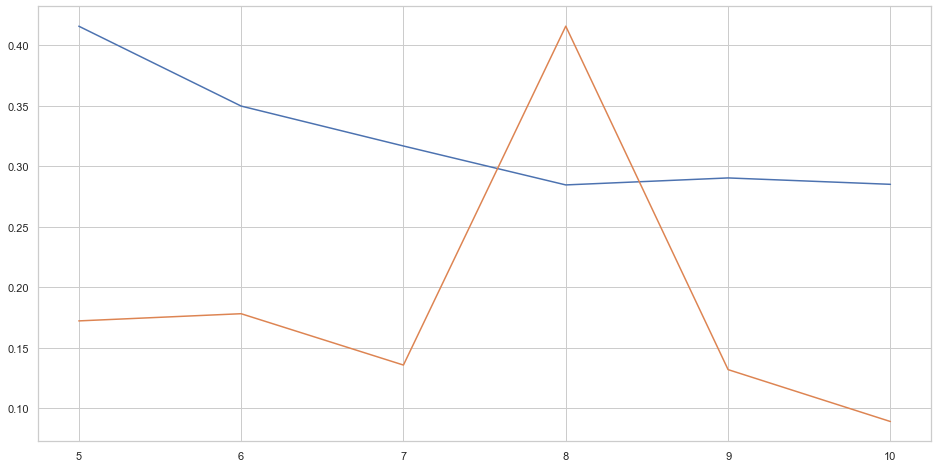

In [5]:
# Creating arrays
binaryFrac = []
tripleFrac = []
totStars = 0
totBins = 0
totTrips = 0

# Looping through all the files
for i in range(nFiles):
    # Generating the filename
    filename = "binaryNumbers" + parameters[i] + ".csv"
    
    # Loading in the files as dataframes
    dataFrameN = pd.read_csv(filename, header=None)
    
    # Summing over the total number of stars, binaries, etc
    totStars = np.sum(dataFrameN[0].to_numpy())
    totBins = np.sum(dataFrameN[1].to_numpy())
    totTrips = np.sum(dataFrameN[2].to_numpy())
    
    # Adding the fractions to the arrays
    binaryFrac.append(totBins/totStars)
    tripleFrac.append(totTrips/totStars)
    
# Plotting
plt.figure(figsize=(16,8))
plt.plot([5,6,7,8,9,10], binaryFrac)
plt.plot([5,6,7,8,9,10], tripleFrac)

C:\Users\Matth\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Matth\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Matth\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Matth\anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Matth\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


30 0
51 4
105 29
86 34
87 31
93 42


Text(0, 0.5, 'Semi-Major Axis, AU')

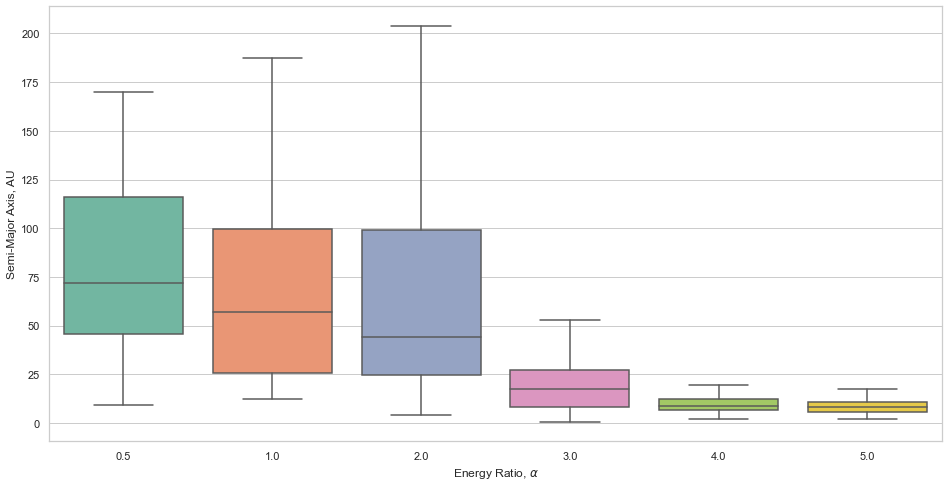

In [3]:
# Setting how many files of data we have
nFiles = 6
parameters = ["5-100-0.5", "5-100-1", "5-100-2", "5-100-3", "5-100-4", "5-100-5"]
column = 1
nStars = [0.5, 1, 2, 3, 4, 5]

# Creating dataframe columns
columns = ["SemiMajorAxis", "Type", "NStars"]

# Creating empty lists
a = []
t = []
n = []
meansB = []
SDsB = []
meansT = []
SDsT = []

# Looping through every file
for i in range(nFiles):
    
    # Generating the filenames
    filenameB = "binaryData" + parameters[i] + ".csv"
    filenameT = "tripleData" + parameters[i] + ".csv"
    
    # Loading in the files as dataframes
    dataFrameB = pd.read_csv(filenameB, header=None)
    dataFrameT = pd.read_csv(filenameT, header=None)
    
    # Getting rid of NaN in the triple data
    dataFrameT = dataFrameT.dropna()
    
    # Extracting the semi-major axis data
    aB = dataFrameB[column].to_numpy()
    aT = dataFrameT[column].to_numpy()
    
    # Calculating the means and SDs
    meansB.append(np.mean(aB/1.5e11))
    SDsB.append(np.std(aB[aB<0.1*max(aB)]/1.5e11))
    meansT.append(np.mean(aT/1.5e11))
    SDsT.append(np.std(aT/1.5e11))
    
    print(len(aB), len(aT))
    
    # Looping
    for j in range(len(aB)):
        a.append(aB[j]/1.5e11)
        t.append("Binary")
        n.append(nStars[i])
        
    for j in range(len(aT)):
        a.append(aT[j]/1.5e11)
        t.append("Triple")
        n.append(nStars[i])
        
# Creating dictionary
dict = {"SemiMajorAxis" : a, "Type": t, "NStars": n}
        
# Creating a dataframe
df = pd.DataFrame(dict)

# Plotting
plt.figure(figsize=(16,8))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="NStars", y="SemiMajorAxis", data=df[df["Type"] == "Binary"], palette="Set2", showfliers =False)
plt.xlabel("Energy Ratio, $\\alpha$")
plt.ylabel("Semi-Major Axis, AU")

# Calculating means and SDs
#plt.plot(meansB, "ko", markersize=4)
#plt.errorbar(x=[0,1,2,3,4,5], y=meansB, yerr=SDsB, fmt=".k", capsize=7)

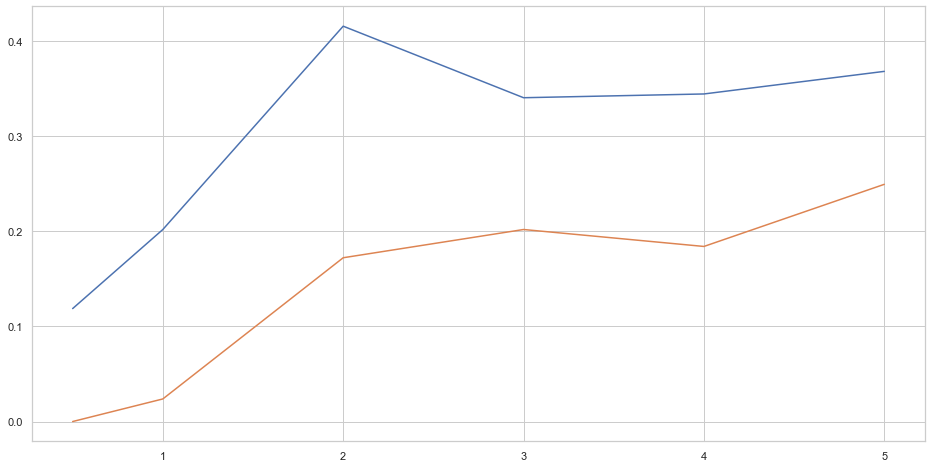

In [9]:
# Creating arrays
binaryFrac = []
tripleFrac = []
totStars = 0
totBins = 0
totTrips = 0

# Looping through all the files
for i in range(nFiles):
    # Generating the filename
    filename = "binaryNumbers" + parameters[i] + ".csv"
    
    # Loading in the files as dataframes
    dataFrameN = pd.read_csv(filename, header=None)
    
    # Summing over the total number of stars, binaries, etc
    totStars = np.sum(dataFrameN[0].to_numpy())
    totBins = np.sum(dataFrameN[1].to_numpy())
    totTrips = np.sum(dataFrameN[2].to_numpy())
    
    # Adding the fractions to the arrays
    binaryFrac.append(totBins/totStars)
    tripleFrac.append(totTrips/totStars)
    
# Plotting
plt.figure(figsize=(16,8))
plt.plot([0.5,1,2,3,4,5], binaryFrac)
plt.plot([0.5,1,2,3,4,5], tripleFrac)

105 29
102 25
100 32
84 21
105 33
101 27


Text(0, 0.5, 'Semi-Major Axis, AU')

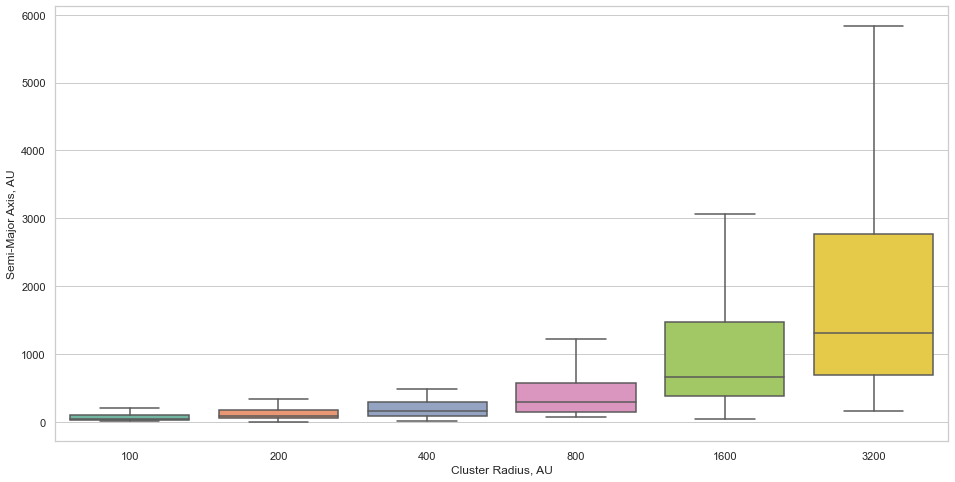

In [2]:
# Setting how many files of data we have
nFiles = 6
parameters = ["5-100-2", "5-200-2", "5-400-2", "5-800-2", "5-1600-2", "5-3200-2"]
column = 1
nStars = [100, 200, 400, 800, 1600, 3200]

# Creating dataframe columns
columns = ["SemiMajorAxis", "Type", "NStars"]

# Creating empty lists
a = []
t = []
n = []
meansB = []
SDsB = []
meansT = []
SDsT = []

# Looping through every file
for i in range(nFiles):
    
    # Generating the filenames
    filenameB = "binaryData" + parameters[i] + ".csv"
    filenameT = "tripleData" + parameters[i] + ".csv"
    
    # Loading in the files as dataframes
    dataFrameB = pd.read_csv(filenameB, header=None)
    dataFrameT = pd.read_csv(filenameT, header=None)
    
    # Getting rid of NaN in the triple data
    dataFrameT = dataFrameT.dropna()
    
    # Extracting the semi-major axis data
    aB = dataFrameB[column].to_numpy()
    aT = dataFrameT[column].to_numpy()
    
    # Calculating the means and SDs
    meansB.append(np.mean(aB/1.5e11))
    SDsB.append(np.std(aB[aB<0.1*max(aB)]/1.5e11))
    meansT.append(np.mean(aT/1.5e11))
    SDsT.append(np.std(aT/1.5e11))
    
    print(len(aB), len(aT))
    
    # Looping
    for j in range(len(aB)):
        a.append(aB[j]/1.5e11)
        t.append("Binary")
        n.append(nStars[i])
        
    for j in range(len(aT)):
        a.append(aT[j]/1.5e11)
        t.append("Triple")
        n.append(nStars[i])
        
# Creating dictionary
dict = {"SemiMajorAxis" : a, "Type": t, "NStars": n}
        
# Creating a dataframe
df = pd.DataFrame(dict)

# Plotting
plt.figure(figsize=(16,8))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="NStars", y="SemiMajorAxis", data=df[df["Type"] == "Binary"], palette="Set2", showfliers =False)
plt.xlabel("Cluster Radius, AU")
plt.ylabel("Semi-Major Axis, AU")

# Calculating means and SDs
#plt.plot(meansB, "ko", markersize=4)
#plt.errorbar(x=[0,1,2,3,4,5], y=meansB, yerr=SDsB, fmt=".k", capsize=7)

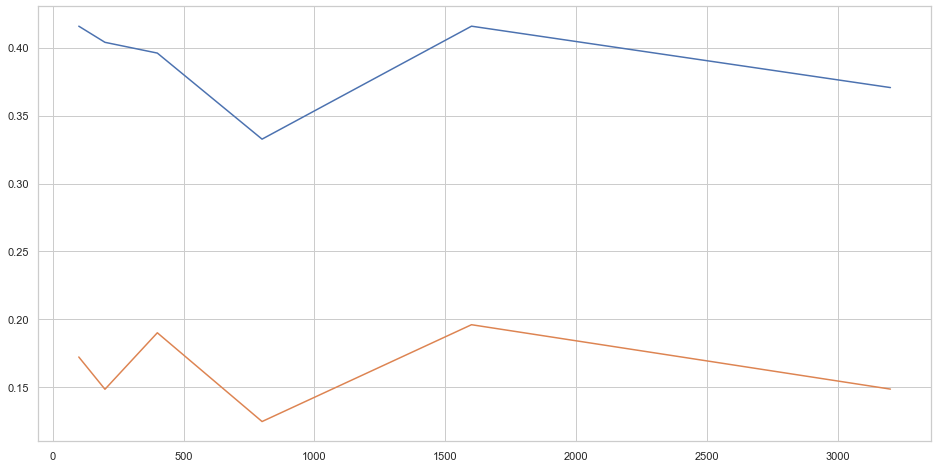

In [3]:
# Creating arrays
binaryFrac = []
tripleFrac = []
totStars = 0
totBins = 0
totTrips = 0

# Looping through all the files
for i in range(nFiles):
    # Generating the filename
    filename = "binaryNumbers" + parameters[i] + ".csv"
    
    # Loading in the files as dataframes
    dataFrameN = pd.read_csv(filename, header=None)
    
    # Summing over the total number of stars, binaries, etc
    totStars = np.sum(dataFrameN[0].to_numpy())
    totBins = np.sum(dataFrameN[1].to_numpy())
    totTrips = np.sum(dataFrameN[2].to_numpy())
    
    # Adding the fractions to the arrays
    binaryFrac.append(totBins/totStars)
    tripleFrac.append(totTrips/totStars)
    
# Plotting
plt.figure(figsize=(16,8))
plt.plot([100, 200, 400, 800, 1600, 3200], binaryFrac)
plt.plot([100, 200, 400, 800, 1600, 3200], tripleFrac)